In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fdconverge-round)

Let $f(x)=e^{-1.3x}$. We apply finite-difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [2]:
f = x -> exp(-1.3 * x);
exact = -1.3

h = [1 / 10^n for n in 1:12]
FD = zeros(length(h), 3)
for (k, h) in enumerate(h)
    nodes = h * (-2:2)
    vals = @. f(nodes)
    FD[k, 1] = dot([0 0 -1 1 0] / h, vals)
    FD[k, 2] = dot([0 -1 / 2 0 1 / 2 0] / h, vals)
    FD[k, 3] = dot([1 / 12 -2 / 3 0 2 / 3 -1 / 12] / h, vals)
end
@pt :header=["h", "FD1", "FD2", "FD4"] [h FD]

h,FD1,FD2,FD4
0.1,-1.21905,-1.30366,-1.29999
0.01,-1.29159,-1.30004,-1.3
0.001,-1.29916,-1.3,-1.3
0.0001,-1.29992,-1.3,-1.3
1.0e-5,-1.29999,-1.3,-1.3
1.0e-6,-1.3,-1.3,-1.3
1.0e-7,-1.3,-1.3,-1.3
1.0e-8,-1.3,-1.3,-1.3
1.0e-9,-1.3,-1.3,-1.3
1.0e-10,-1.3,-1.3,-1.3


They all seem to be converging to $-1.3$. The convergence plot reveals some interesting structure to the errors, though.

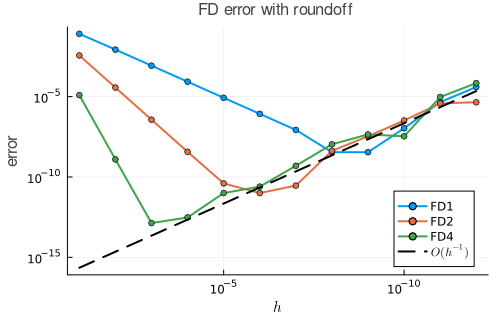

In [3]:
err = @. abs(FD - exact)
plot(h, err;
    m=:o, label=["FD1" "FD2" "FD4"],  legend=:bottomright,
    xaxis=(:log10, L"h"),  xflip=true,  yaxis=(:log10, "error"),
    title="FD error with roundoff")

# Add line for perfect 1st order.
plot!(h, 0.1 * eps() ./ h, l=:dash, color=:black, label=L"O(h^{-1})")

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the fourth-order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy).